# 03. 텀블러(Tumblr) 대시보드 크롤링하고 검색하기
- 자유도가 높은 서비스이지만 검색할 때 힘든 점이 있으며, 내 타임라인에 올라온 글들을 크롤링해서 수집한 다음 그 안에서 검색하는 프로그램
- 텀블러 계정이 필요

## 텀블러(Tumblr)

### 텀블러 API 애플리케이션 등록하기
- [웹 API](https://www.tumblr.com/docs/en/api/v2)
- [등록 페이지](https://www.tumblr.com/oauth/apps)
- 필수 입력 항목 앱 이름(dashboard_crawler), 앱 웹 사이트(https://localhost:5000/app), 앱 설명, 기본 콜백 URL(http://localhost:5000/callback_page)
- 등록 이후 Explore API 클릭, consumer key와 secret key 등록, 수락

### 샘플 코드 사용하기
- Dashboard - PYTHON (https://api.tumblr.com/console/calls/user/dashboard)
- `pip install pytumblr`

In [2]:
import json
import pytumblr

# OAuth 인증을 사용한 API 클라이언트 객체 생성
client = pytumblr.TumblrRestClient(
    'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
    'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
)

In [3]:
def get_dashboard_posts(limit=1, tp='text'):
    """대시보드의 글 추출하기"""
    return client.dashboard(limit=limit, type=tp)

In [4]:
if __name__ == '__main__':
    dashboard_posts = get_dashboard_posts(tp='photo', limit=2)
    print(json.dumps(dashboard_posts, ensure_ascii=False))

{"posts": [{"type": "photo", "blog_name": "gizembenturk", "blog": {"name": "gizembenturk", "title": "Pisilettas", "description": "<p>Ben değilsem kedidir kedi</p>", "url": "https://gizembenturk.tumblr.com/", "uuid": "t:wkxGHZW2BfYurDDDVbF8yA", "updated": 1633601140}, "id": 664378949087920128, "id_string": "664378949087920128", "post_url": "https://gizembenturk.tumblr.com/post/664378949087920128/ben-evde-yokken-y%C3%BCrek-da%C4%9Flayan-bak%C4%B1%C5%9F-stilleri", "slug": "ben-evde-yokken-yürek-dağlayan-bakış-stilleri", "date": "2021-10-07 10:05:38 GMT", "timestamp": 1633601138, "state": "published", "format": "html", "reblog_key": "nk0bxYRa", "tags": ["bücür", "guzelpisilettalarim", "catlover", "catsofinstagram", "cats_of_instagram", "pleasantcat", "cats", "kedi", "catstagram", "instacat", "猫", "ねこ", "neko", "gato", "고양이", "catlovers", "catsagram", "ネコ", "ねこ部", "katze", "igdaily", "instagood", "paw", "catlove", "tail"], "short_url": "https://tmblr.co/Z1qlruauMI9OeW00", "summary": "Ben ev

In [30]:
dashboard_posts['posts'][0]['photos'][0]['original_size']['url']

'https://64.media.tumblr.com/105d12be90ff28960638f25ec1f82283/72cb3fd1d7235bc7-f1/s1280x1920/9204b82c317d3c8b1819fd2658d69ad48eab6540.jpg'

In [5]:
dashboard_posts['posts'][1]['photos'][0]['original_size']['url']

'https://64.media.tumblr.com/bde7f9d239d2d39b4600122930f586cb/02b8fad7b0465b67-93/s1280x1920/191221f57190d1721ac4b5f0fee8a5a4b5ddefbc.png'

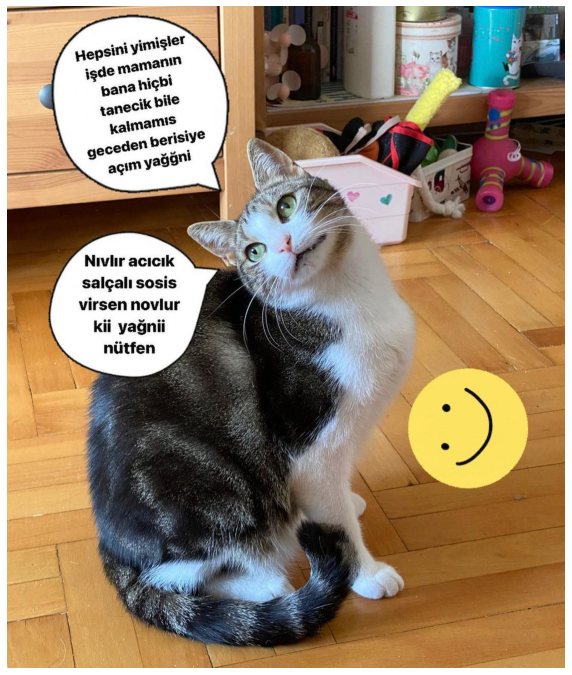

In [36]:
from skimage import io
import matplotlib.pyplot as plt


url = dashboard_posts['posts'][0]['photos'][0]['original_size']['url']
img = io.imread(url)

plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(img)
plt.show()

### 이미지 저장

In [8]:
import urllib

if __name__ == '__main__':
    limit = 10
    dashboard_posts = get_dashboard_posts(tp='photo', limit=limit)
    for i in range(limit):
        imgurl = dashboard_posts['posts'][i]['photos'][0]['original_size']['url']

        urllib.request.urlretrieve(imgurl, f'data/image{i}.png')